**ЛР 2**  
**Вариант 20**

**Линейная нейронная сеть. Правило обучения Уидроу-Хоффа**

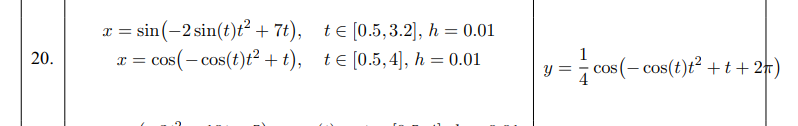

**Часть 1**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import initializers

import math
import numpy as np
import matplotlib.pyplot as plt

**Часть 1**

Функция сигнала х для первой части

In [3]:
def signal(t):
  return math.sin(- 2 * math.sin(t) * t**2 + 7 * t)

In [4]:
h = 0.01   # задержка обучения
l = 0.5
r = 3.2
t = np.arange(l, r, h)
signals = [signal(i) for i in t]

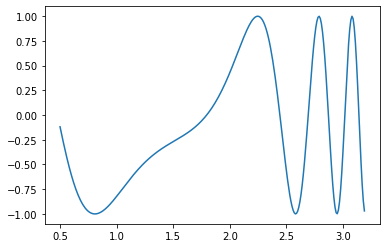

In [5]:
plt.plot(t, signals)
plt.show()

In [6]:
t.shape[0]

270

In [7]:
D = 5           # задержка
X_train = []
y_train = []

for i in range(t.shape[0] - D):
    X_train.append(signals[i:i + D])
    y_train.append(signals[i + D])

In [8]:
model = keras.models.Sequential()
model.add(layers.Dense(1, 
                       activation = "linear", 
                       kernel_initializer=initializers.RandomNormal(stddev=0.01),
                       bias_initializer='zeros'))
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.05), 
              loss = 'mse',
              metrics = ["mae"])

In [9]:
hist = model.fit(X_train, y_train, batch_size = 1, epochs = 50, shuffle = True)

Epoch 1/50
265/265 [==============================] - 1s 3ms/step - loss: 0.0241 - mae: 0.0989
Epoch 2/50
265/265 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0375
Epoch 3/50
265/265 [==============================] - 0s 2ms/step - loss: 0.0021 - mae: 0.0302
Epoch 4/50
265/265 [==============================] - 0s 1ms/step - loss: 0.0020 - mae: 0.0291
Epoch 5/50
265/265 [==============================] - 0s 2ms/step - loss: 0.0019 - mae: 0.0292
Epoch 6/50
265/265 [==============================] - 1s 2ms/step - loss: 0.0019 - mae: 0.0291
Epoch 7/50
265/265 [==============================] - 1s 2ms/step - loss: 0.0019 - mae: 0.0292
Epoch 8/50
265/265 [==============================] - 1s 3ms/step - loss: 0.0017 - mae: 0.0273
Epoch 9/50
265/265 [==============================] - 1s 2ms/step - loss: 0.0017 - mae: 0.0281
Epoch 10/50
265/265 [==============================] - 0s 2ms/step - loss: 0.0018 - mae: 0.0279
Epoch 11/50
265/265 [============================

In [10]:
prediction = model.predict(X_train)

9/9 [==============================] - 0s 2ms/step


In [11]:
prediction.shape[0]

265

In [12]:
predictions = []
for i in range(prediction.shape[0]):
  predictions.append(prediction[i][0])

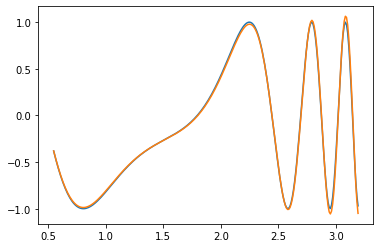

In [13]:
plt.plot(t[D:], signals[D:])
plt.plot(t[D:], predictions)
plt.show()

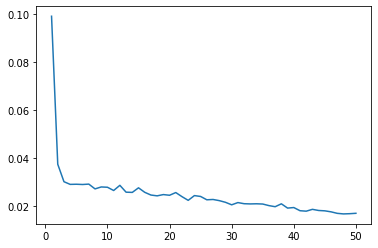

In [14]:
x_hist = [(i + 1) for i in range(len(hist.history["mae"]))]
plt.plot(x_hist, hist.history["mae"])

In [15]:
delta = []
for i in range(len(predictions)):
  delta.append(signals[D + i] - predictions[i])

In [16]:
len(delta)

265

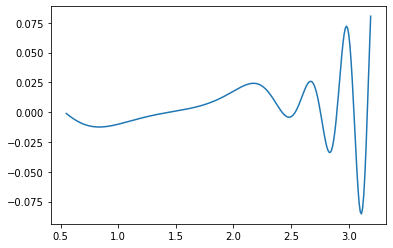

In [17]:
plt.plot(t[D:], delta)
plt.show()

**Часть 2**

In [20]:
def true_signal(t):
  return 1 / 4 * math.cos(- math.cos(t) * t**2 + t + 2 * math.pi)

In [21]:
def signal2(t):
  return math.cos(-math.cos(t) * t ** 2 + t)

In [26]:
D = 3
h = 0.01   # задержка обучения
l = 0.5
r = 4
t = np.arange(l, r, h)
signals2 = [signal2(i) for i in t]
signalst = [true_signal(i) for i in t]
t.shape[0]

350

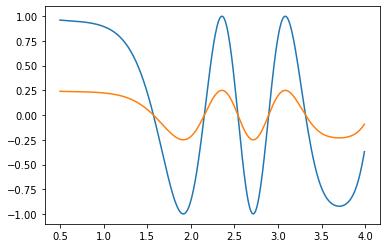

In [27]:
plt.plot(t, signals2)
plt.plot(t, signalst)
plt.show()

In [29]:
D = 5           # задержка
X_train = []
y_train = []

for i in range(t.shape[0] - D):
    X_train.append(signals2[i:i + D])
    y_train.append(signalst[i + D])

In [30]:
model = keras.models.Sequential()
model.add(layers.Dense(1, 
                       activation = "linear", 
                       kernel_initializer=initializers.RandomNormal(stddev=0.01),
                       bias_initializer='zeros'))
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.05), 
              loss = 'mse',
              metrics = ["mae"])

In [31]:
hist = model.fit(X_train, y_train, batch_size = 1, epochs = 50, shuffle = True)

Epoch 1/50
345/345 [==============================] - 1s 919us/step - loss: 7.8245e-04 - mae: 0.0198
Epoch 2/50
345/345 [==============================] - 0s 980us/step - loss: 1.9627e-04 - mae: 0.0112
Epoch 3/50
345/345 [==============================] - 0s 918us/step - loss: 6.8006e-05 - mae: 0.0065
Epoch 4/50
345/345 [==============================] - 0s 960us/step - loss: 2.6661e-05 - mae: 0.0042
Epoch 5/50
345/345 [==============================] - 0s 935us/step - loss: 1.2327e-05 - mae: 0.0029
Epoch 6/50
345/345 [==============================] - 0s 1ms/step - loss: 7.1811e-06 - mae: 0.0022
Epoch 7/50
345/345 [==============================] - 0s 1ms/step - loss: 5.1254e-06 - mae: 0.0019
Epoch 8/50
345/345 [==============================] - 1s 2ms/step - loss: 4.7223e-06 - mae: 0.0018
Epoch 9/50
345/345 [==============================] - 0s 1ms/step - loss: 4.4714e-06 - mae: 0.0017
Epoch 10/50
345/345 [==============================] - 0s 926us/step - loss: 4.3765e-06 - mae: 0.00

In [34]:
prediction = model.predict(X_train)
predictions = []
for i in range(prediction.shape[0]):
  predictions.append(prediction[i][0])

11/11 [==============================] - 0s 1ms/step


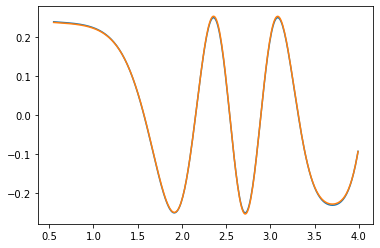

In [36]:
plt.plot(t[D:], signalst[D:])
plt.plot(t[D:], predictions)
plt.show()

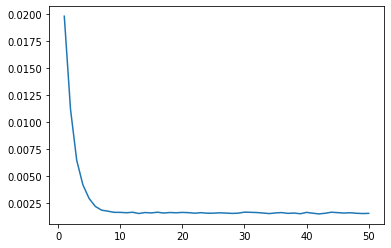

In [37]:
x_hist = [(i + 1) for i in range(len(hist.history["mae"]))]
plt.plot(x_hist, hist.history["mae"])

In [42]:
delta = []
for i in range(len(predictions)):
  delta.append(signalst[D + i] - predictions[i])

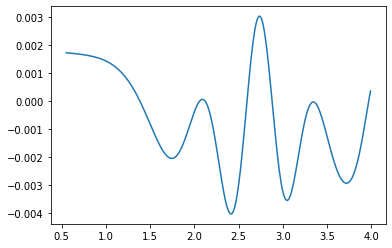

In [43]:
plt.plot(t[D:], delta)
plt.show()